# Task # 2 - To Explore Supervised Machine Learning
Here the task is to predict score based on the numbers of hours he/she studies.
So here I'm using Supervised Machine Learning, the method I choose is Simple Linear regression.

## Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics  
%matplotlib inline

## Loading data from the given url

In [5]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Checking for Null values in the DataSet

In [6]:
dataset.isnull().any()

Hours     False
Scores    False
dtype: bool

In this dataset there is no null values hence we proceed

## Plotting Hours v/s score

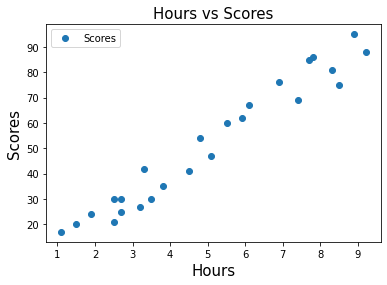

In [7]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores',fontsize=15)  
plt.xlabel('Hours',fontsize=15)  
plt.ylabel('Scores',fontsize=15)  
plt.show()

## Dividing of Dataset

In [8]:
'''Dividing dataset to attributes and values.
Here attribute is hours(independent variable) and value is score(dependent variable).'''
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

## Splitting of dataset

In [9]:
#Splitting of dataset into training and testset.Here 80% data is taken for training and 20% for testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0) 

## Simple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


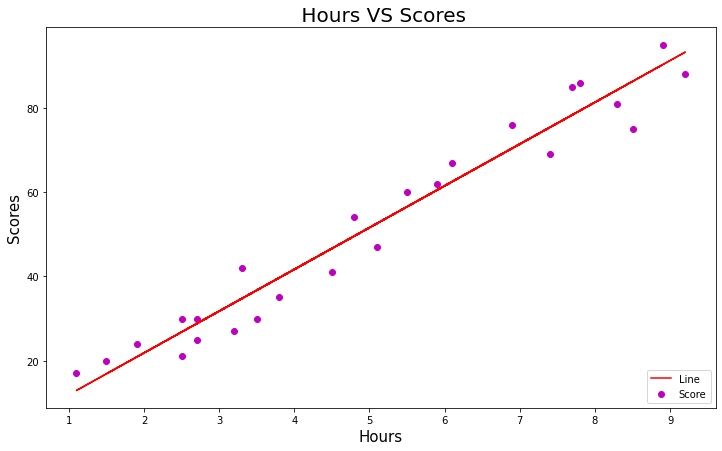

Model has been trained


In [13]:
line=regressor.coef_*X+regressor.intercept_
plt.figure(figsize=(12,7))
plt.scatter(X,y,c='m',label='Score')
plt.plot(X,line,c='r',label='Line')
plt.title(" Hours VS Scores",fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.legend(loc=4)
plt.show()
print("Model has been trained")


## Making Predictions

In [14]:
y_pre=regressor.predict(X_test)
y_pre

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
data_pre=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
data_pre

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Plotting of bar graph to see actual and predicted values

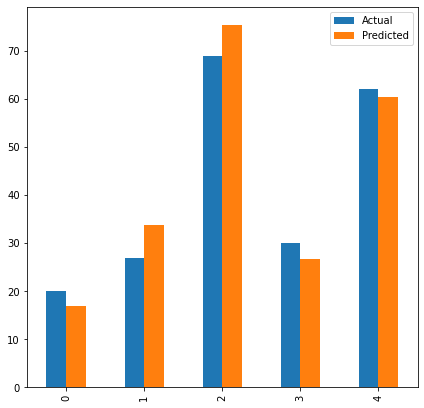

In [16]:
#plotting the grid to depict the actual and predicted value
data_pre.plot(kind='bar',figsize=(7,7))
plt.show()

## Testing with given input 

In [17]:
hour=9.25
pre_score=regressor.predict([[hour]])
print(f"No of Hour = {hour}")
print(f"Predicted Score = {pre_score[0]}")

No of Hour = 9.25
Predicted Score = 93.69173248737535


## Evaluating the performance of Algorithm 

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pre))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pre))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


# GUI For predicting the score

In [19]:
from tkinter import * #importing tkinter
import pyttsx3 #importing pyttsx3 for speech 
global engine
engine = pyttsx3.init('sapi5')
root=Tk()
root.title("Score Predictor")
def predict():
    hours =float(my_entry.get())
    own_pred = regressor.predict([[hours]])
    answer1_label.config(text="No of hours :"+ str(hours))
    answer2_label.config(text="Predicted Score :"+ str(round(own_pred[0],2)))
    engine.say("Your predicted score is"+str(round(own_pred[0],2)))
    engine.runAndWait()
    
my_label=Label(root,text="Enter the number of Hours Studied:",font=("Helvetica",18)).pack(pady=20)
my_entry=Entry(root)
my_entry.pack(pady=20)
my_submit=Button(root,text="Submit",font=("Helvetica",18),command=predict).pack(pady=10)
answer1_label=Label(root,text="",font=("Helvetica",18))
answer1_label.pack(pady=10)
answer2_label=Label(root,text="",font=("Helvetica",18))
answer2_label.pack(pady=10)
root.mainloop()